# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = df.drop(['price_aprox_usd'], axis=1) #dataframe con todo menos la columna price_aprox_usd
y = df['price_aprox_usd']                #solo columna price_aprox_usd

# Realizá la separación a continuación en esta celda
#X_train: va a tener nuestros datos de entrenamiento
#X_test: son los datos separados para testear nuestro modelo
#y_train: el target de los datos de entrenamiento
#y_test: los datos que vamos a comparar con las predicciones que nosotros hallamos hecho.
#las predicciones se hacen sobre los conjuntos de testeo
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state=10)
y_train.head()

C:\Users\LauraGimenaHuallpaAr\Miniconda2\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


4720   163000.000
1065   150000.000
5296   126480.000
4865   160000.000
2659    93000.000
Name: price_aprox_usd, dtype: float64

In [5]:
X_test.shape

(1276, 58)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [6]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [7]:
# Acá realizá la predicción ##sobre el conjunto de testeo.

y_pred=clf.predict(X_test)


**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [8]:
# En esta celda calculá el rmse ### el rmse en el conjunto de test ??
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt
tree_mse = mean_squared_error(y_test, y_pred)
np.sqrt(tree_mse)

24755.723901248526

__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

In [15]:
elementos = [5,10,15,20,25]

rmses_train=[]
rmses_test=[]

for i in elementos:
    tree_reg= DecisionTreeRegressor(max_depth=i)
    tree_reg.fit(X_train, y_train)
    
    y_pred= tree_reg.predict(X_test)  
    y_pred_train= tree_reg.predict(X_train) 
    
    calc_test=np.sqrt(np.mean((y_test - y_pred) ** 2))
    calc_train=np.sqrt(np.mean((y_train - y_pred_train) ** 2))
    
    rmses_test.append(calc_test)
    rmses_train.append(calc_train)
    
print(rmses_test)
print(rmses_train)

[21837.770532741775, 21447.38670717899, 23809.111850558715, 24763.299238486063, 24576.335405269638]
[21245.116723594165, 15781.385330682668, 8948.839222292052, 3618.9508800310314, 882.4439986207828]


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

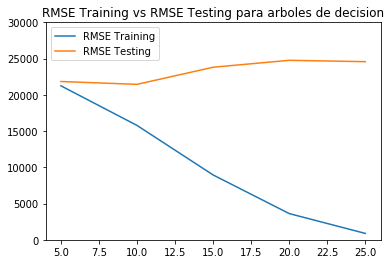

In [17]:
plt.plot(elementos, rmses_train, label='RMSE Training')
plt.plot(elementos, rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para arboles de decision")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [18]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train) 

y_knn_predict = knn.predict(X_test) #pedimos una prediccion con este conjunto test
y_knn_predict
rmse_KNN=np.sqrt(mean_squared_error(y_test,y_knn_predict))
print("RMSE del conjunto de prueba: ", rmse_KNN)

('RMSE del conjunto de prueba: ', 22581.570724015037)


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [19]:
# Calculá los cambio en el rmse en esta celda

array_elementos=[1,2,3,4,5]
rmses_train=[]
rmses_test=[]

for i in array_elementos:
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train,y_train)
    
    y_pred_test=knn_reg.predict(X_test)
    y_pred_train=knn_reg.predict(X_train)
    Resultado_test_knn=np.sqrt(mean_squared_error(y_test,y_pred_test))
    Resultado_train_knn=np.sqrt(mean_squared_error(y_train, y_pred_train))
                  
    rmses_test.append(Resultado_test_knn)
    rmses_train.append(Resultado_train_knn)
    
print(rmses_test)
print(rmses_train)

[26252.85014785883, 23790.540190301253, 23072.3300402141, 22834.363132208182, 22581.570724015037]
[710.2694889003363, 13947.027133757347, 16634.06736932272, 18013.79110714349, 18886.18296094331]


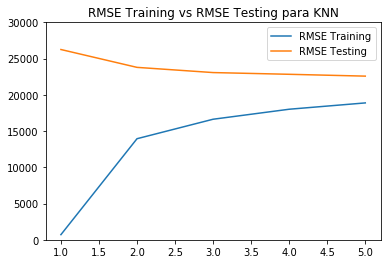

In [20]:
plt.plot(array_elementos, rmses_train, label='RMSE Training') #RANGO (INICIO, FIN, CANTIDAD DE ITERACION)
plt.plot(array_elementos, rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [22]:
def nmsq2rmse(score): #Metodo para convertir de NMSE a MSE
    return np.sqrt(-score)

In [25]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score
rmse_scores = cross_val_score(clf, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

regressor=clf ##renombrar arbol de decision

In [27]:
rmse_scores= nmsq2rmse(rmse_scores)

print("Scores: ", rmse_scores)
print("Promedio: ", rmse_scores.mean())

('Scores: ', array([24596.91270657, 26022.32190119, 27621.97477365, 27689.40438451,
       26091.95338468, 25314.46580743, 24057.32382397, 28178.40227147,
       24439.45369067, 25131.47880426]))
('Promedio: ', 25914.36915484058)


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [28]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [27]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [28]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,157500.000,172000.000,14500.000
1,120000.000,92999.000,27001.000
2,150000.000,145000.000,5000.000
3,134500.000,150000.000,15500.000
4,150000.000,159000.000,9000.000
5,134000.000,126000.000,8000.000
6,175000.000,154000.000,21000.000
7,62000.000,68000.000,6000.000
8,129000.000,150000.000,21000.000
9,90000.000,118000.000,28000.000
